In [15]:
import urllib.request 
import gensim 
from gensim.models import word2vec 
from gensim.models import Word2Vec
import pandas as pd
from pymorphy2 import MorphAnalyzer

In [16]:
corpus = pd.read_csv('texts.csv', encoding='utf-8')

In [17]:
corpus.head()

,text
0,В 1930-е годы Советский Союз охватила лихорадк...
1,Олимпийская чемпионка по фигурному катанию Ал...
2,Российский врач-диетолог Римма Мойсенко объясн...
3,В 2019 году телеканал «Ю» запустил адаптацию з...
4,Актер Михаил Ефремов систематически употребл...


Данный корпус содержит тексты статей из новостного сайта lenta.ru. Датасет содержит 5001 запись 

In [205]:
from statistics import median
text_of_all_news = []
for t in corpus['text']:
    text_of_all_news.append(t)
a = 0
for st in text_of_all_news:
    a += int(len(st.split()))
aver_words = a/corpus.shape[0]
med = []
for t in corpus['text']:
    med.append(int(len(t.split())))
med = median(med)
print('Количество строк: {}'.format(corpus.shape[0]))
print('Суммарное количество слов по всем статьям: {}'.format(a))
print('Среднее количество слов на одну статью: {}'.format(aver_words))
print('Медиана количества слов на одну статью: {}'.format(med))

Количество строк: 5001
Суммарное количество слов по всем статьям: 1026536
Среднее количество слов на одну статью: 205.26614677064586
Медиана количества слов на одну статью: 160


### Предобработка корпуса

In [67]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pymorphy2
import string
punct = string.punctuation + "—" + "«" + "»"
stopwords_list = stopwords.words("russian") + ["это", "который", "наш", 
                                            "такой", "свой", "один", "другой", "всё", "все", "весь", "очень", "нужно",
                                            "каждый", "её","его", "ранее", "мочь", 
                                            "стать", "больший", "ваше", "самый", "понять",
                                            "ещё", "также", "например", "тот", "быть", "год", "имя", "июль", "январь", "группа", "август", "век", "название", "март", "октябрь", "июнь", \
                                              "апрель", "декабрь", "февраль", "часть", "ноябрь", "ряд", "май", "сергей", "тысяча", "день", "миллион", "владимир", "миллиард", "александр"]
analyzer = pymorphy2.MorphAnalyzer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\redic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\redic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Напишем функции, которые убирают все ненужные символы, стоп-слова, оставляют только существительные и приводят их к начальной форме

In [68]:
texts = corpus['text'].to_list()

In [69]:
def _change(list_of_texts):
    for i in range(len(list_of_texts)):
        list_of_texts[i] = re.sub(r"[^а-яА-Я]",' ', list_of_texts[i])
        list_of_texts[i] = re.sub(r"\xa0",' ', list_of_texts[i])
        tokens = word_tokenize(list_of_texts[i])    
        tokens = [token.lower() for token in tokens if token not in stopwords_list]
        list_of_texts[i] = [word for word in tokens if word not in stopwords_list]
    return list_of_texts

def _speech(list_of_texts):
    all_lemma = []
    for i in range(len(list_of_texts)):
        one_lemma = []
        for word in list_of_texts[i]:
            if analyzer.parse(word)[0].tag.POS == 'NOUN': 
                if analyzer.parse(word)[0].normal_form not in stopwords_list:
                    one_lemma.append(analyzer.parse(word)[0].normal_form)
        all_lemma.append(one_lemma)
    return all_lemma

In [70]:
first_corpus = _change(texts)
final_corpus = _speech(first_corpus)

In [71]:
final_corpus[1][:10]

['чемпионка',
 'катание',
 'алина',
 'загитов',
 'шоу',
 'период',
 'переговоры',
 'фигуристка',
 'загитов',
 'телевидение']

#### Посчитаем сколько раз каждое слово повторяется во всех текстах

In [72]:
from collections import Counter

In [73]:
help_corpus = []
for i in range(len(final_corpus)):
    for j in final_corpus[i]:
        help_corpus.append(j)

Общее количество слов - 371112

In [74]:
len(help_corpus)

371112

In [75]:
amount_words = dict(Counter(help_corpus))

Количество уникальных слов - 20855

In [147]:
len(amount_words)

20855

К примеру, слово 'чемпионка' встречается 46 раз

In [77]:
amount_words['чемпионка']

46

#### Проранжируем слова по убыванию их встречаемости и посмотрим на 50 самых распространенных слова

In [78]:
sorted_words = sorted(amount_words.items(), key=lambda x: x[1], reverse = True)

In [119]:
most_freq = sorted_words[:50]

In [121]:
most_freq[:50]

[('россия', 4134),
 ('человек', 4096),
 ('коронавирус', 3361),
 ('страна', 2666),
 ('время', 2386),
 ('слово', 2378),
 ('президент', 1985),
 ('москва', 1855),
 ('сша', 1827),
 ('случай', 1490),
 ('глава', 1444),
 ('число', 1428),
 ('процент', 1393),
 ('компания', 1345),
 ('данные', 1339),
 ('дело', 1275),
 ('работа', 1260),
 ('рубль', 1191),
 ('мир', 1113),
 ('город', 1071),
 ('дом', 1063),
 ('место', 1056),
 ('власть', 1009),
 ('результат', 1002),
 ('ситуация', 987),
 ('украина', 974),
 ('ребёнок', 940),
 ('издание', 936),
 ('сотрудник', 934),
 ('помощь', 869),
 ('регион', 848),
 ('пандемия', 836),
 ('мера', 828),
 ('информация', 818),
 ('вопрос', 816),
 ('решение', 813),
 ('начало', 808),
 ('сторона', 790),
 ('россиянин', 777),
 ('министр', 761),
 ('область', 736),
 ('путин', 736),
 ('вирус', 733),
 ('режим', 729),
 ('мужчина', 728),
 ('врач', 726),
 ('организация', 711),
 ('гражданин', 709),
 ('жизнь', 708),
 ('представитель', 708)]

#### Создадим список, который будет содержать пару слов и количество документов, в которых они оба встречаются

In [200]:
der = []
for first_word in most_freq:
    for second_word in most_freq:
        count = 0
        for t in range(len(final_corpus)):
            if first_word[0] in final_corpus[t] and second_word[0] in final_corpus[t]:
                if first_word[0] != second_word[0]:
                    count +=1
        if count > 2:
            der.append((first_word[0], second_word[0], count))

In [201]:
der[:15]

[('россия', 'человек', 788),
 ('россия', 'коронавирус', 745),
 ('россия', 'страна', 805),
 ('россия', 'время', 622),
 ('россия', 'слово', 825),
 ('россия', 'президент', 633),
 ('россия', 'москва', 619),
 ('россия', 'сша', 320),
 ('россия', 'случай', 535),
 ('россия', 'глава', 548),
 ('россия', 'число', 527),
 ('россия', 'процент', 282),
 ('россия', 'компания', 265),
 ('россия', 'данные', 505),
 ('россия', 'дело', 345)]

#### Построим граф для этих слов

In [131]:
import networkx as nx
import matplotlib.pyplot as plt

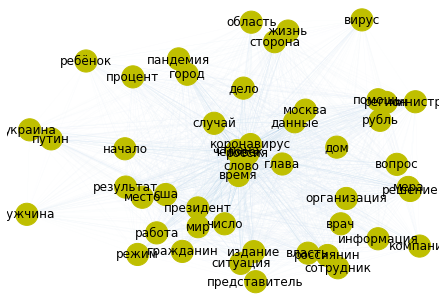

In [202]:
der_2 = der
G = nx.Graph()
G.add_weighted_edges_from(der_2)
density = nx.density(G)
node_sizes = [deg*10 for node, deg in list(G.degree)]
import matplotlib.pyplot as plt

pos = nx.layout.spring_layout(G)
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
nx.draw(G, pos, node_color='y', node_size=node_sizes, edgelist=edges, edge_color=weights, width=0.10, with_labels=True, edge_cmap=plt.cm.Blues)
plt.show()

#### Построим граф другого типа

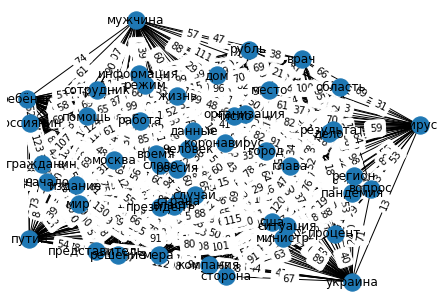

<Figure size 10800x10800 with 0 Axes>

In [203]:
G = nx.Graph()
G.add_weighted_edges_from(der)
labels = nx.get_edge_attributes(G, "weight")
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.figure(figsize=(150,150))
plt.show()

### Как видно,  графы выглядят не совсем неразборчиво, поэтому построим для меньшего количества слов (десяти) 

In [195]:
top_freq = sorted_words[:10]

In [196]:
doc_top = {}
for w in range(len(top_freq)):
    temp = []
    for t in range(len(final_corpus)):
        if top_freq[w][0] in final_corpus[t]:
            temp.append(t)
    doc_top[top_freq[w][0]] = ap 

In [197]:
weights = []
for first_word in top_freq:
    for second_word in top_freq:
        count = 0
        for t in range(len(final_corpus)):
            if first_word[0] in final_corpus[t] and second_word[0] in final_corpus[t]:
                if first_word[0] != second_word[0]:
                    count +=1
        if count > 2:
            weights.append((first_word[0], second_word[0], count))

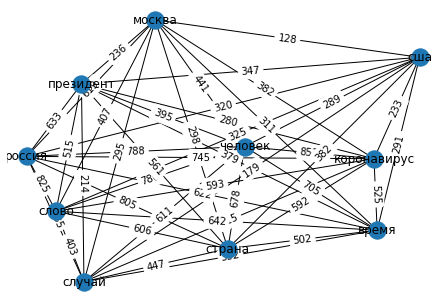

<Figure size 18000x18000 with 0 Axes>

In [198]:
weights_2 = weights
G = nx.Graph()
G.add_weighted_edges_from(weights_2)
labels = nx.get_edge_attributes(G, "weight")
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.figure(figsize=(250,250))
plt.show()

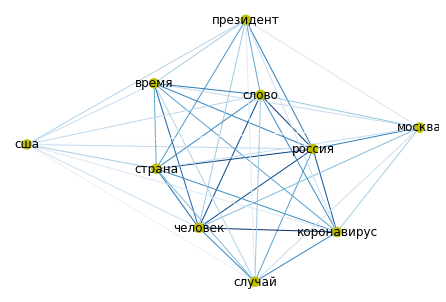

In [199]:
G = nx.Graph()
G.add_weighted_edges_from(weights)
density = nx.density(G)
node_size_s = [deg*10 for node, deg in list(G.degree)]
pos = nx.layout.spring_layout(G)
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
nx.draw(G, pos, node_color='y', node_size=node_size_s, edgelist=edges, edge_color=weights, width=1, with_labels=True, edge_cmap=plt.cm.Blues)
plt.show()

#### Как видно, графы стали более понятные